<a href="https://colab.research.google.com/github/dsibi/yandex_praktikum_da/blob/main/assessment_of_traffic_sources/assessment_of_traffic_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Аналитика в Яндекс.Афише**

---

## Описание проекта

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
*  лог сервера с данными о посещениях сайта Яндекс.Афиши,
*  выгрузка всех заказов за этот период,
*  статистика рекламных расходов.

Вы изучите:
*  как люди пользуются продуктом,
*  когда они начинают покупать,
*  сколько денег приносит каждый клиент
*  когда клиент окупается.

##Описание данных

Таблица visits (лог сервера с информацией о посещениях сайта):
* Uid — уникальный идентификатор пользователя
* Device — категория устройства пользователя
* Start Ts — дата и время начала сессии
* End Ts — дата и время окончания сессии
* Source Id — идентификатор рекламного источника, из которого пришел пользователь

Таблица orders (информация о заказах):
* Uid — уникальный id пользователя, который сделал заказ
* Buy Ts — дата и время заказа
* Revenue — выручка Яндекс.Афиши с этого заказа

Таблица costs (информация о затратах на маркетинг):
* source_id — идентификатор рекламного источника
* dt — дата
* costs — затраты на этот рекламный источник в этот день

##Шаг 1. Загрузим данные и подготовим их к анализу

---



###1.1. Загрузим файлы с данными и изучим общую информацию

Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Чтение файлов

In [ ]:
# visits=pd.read_csv('/datasets/visits_log.csv')
# orders=pd.read_csv('/datasets/orders_log.csv')
# costs=pd.read_csv('/datasets/costs.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Чтение файлов

In [ ]:
visits=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/7_Анализ бизнес-показателей/!Project/data/visits_log.csv')
orders=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/7_Анализ бизнес-показателей/!Project/data/orders_log.csv')
costs=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/7_Анализ бизнес-показателей/!Project/data/costs.csv')

Изучим общую информацию 

In [ ]:
df_list = [visits, orders, costs]
for df in df_list:   
    print('Первые 5 строк датафрейма')
    print('-'*80)
    display(df.head(5))
    print('-'*80)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('-'*80)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(df.isna().sum())

Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


--------------------------------------------------------------------------------
Размер датафрейма: (строк:столбцов) (359400, 5)
--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
Device       0
End 

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


--------------------------------------------------------------------------------
Размер датафрейма: (строк:столбцов) (50415, 3)
--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
Buy Ts     0
Revenue    0
Uid        0
dtype: int64
Первые 5 строк датафрейма
---------------------------------

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


--------------------------------------------------------------------------------
Размер датафрейма: (строк:столбцов) (2542, 3)
--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
source_id    0
dt           0
costs        0
dtype: int64


1. Названия столбцов: корректировка требуется в visits и orders.
2. Типы данных: необходимо скорректировать ряд столбцов в формат даты.
3. Пропуски отсутствуют.
4. Аномалии в данных на первый взгляд отсутствуют.

###1.2. Подготовим данные к анализу

####Корректировка названий столбцов

In [ ]:
for df in df_list:
  df.columns=[col.lower().replace(' ','_') for col in df.columns]

####Произведем изменение типа данных 

In [ ]:
df_list = [visits, orders, costs]
for df in df_list:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [ ]:
visits['end_ts']=pd.to_datetime(visits['end_ts'])
visits['start_ts']=pd.to_datetime(visits['start_ts'])
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])
costs['dt']=pd.to_datetime(costs['dt'])

In [ ]:
df_list = [visits, orders, costs]
for df in df_list:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

Подготовку данных к анализу завершили.

##Шаг 2. Построим отчёты и посчитаем метрики

---



###2.1. Продукт

#### 2.1.1. Сколько людей пользуются в день, неделю, месяц?

Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы месяц и неделю, а также полную дату.

In [ ]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
# visits['session_week'] = visits['start_ts'].dt.week
visits['session_month'] = visits['start_ts'].dt.month

Посчитаем метрики. Сгруппируем данные по уникальным пользователям и построим графики.

In [ ]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'})
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'})
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'})



*   дни



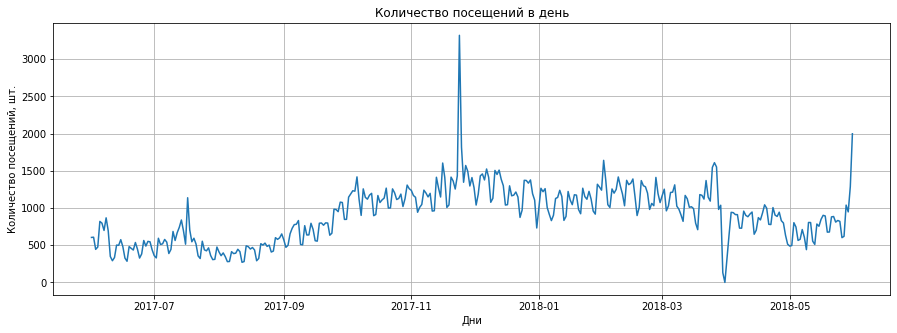

In [ ]:
dau_total.plot(grid=True, title='Количество посещений в день', figsize=(15, 5),legend=False)
plt.gca().set(xlabel='Дни', ylabel='Количество посещений, шт.')
plt.show()

Среднее DAU:

In [ ]:
dau_total.mean().astype('int')

uid    907
dtype: int64



*   недели



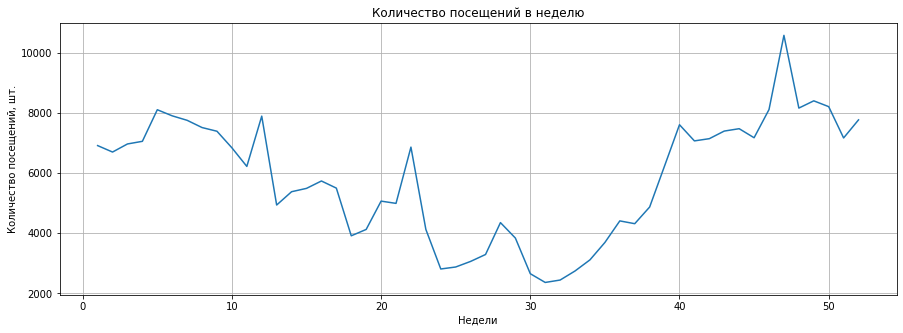

In [ ]:
wau_total.plot(grid=True, title='Количество посещений в неделю', figsize=(15, 5),legend=False)
plt.gca().set(xlabel='Недели', ylabel='Количество посещений, шт.')
plt.show()

Среднее WAU:

In [ ]:
wau_total.mean().astype('int')

uid    5825
dtype: int64



*   месяца



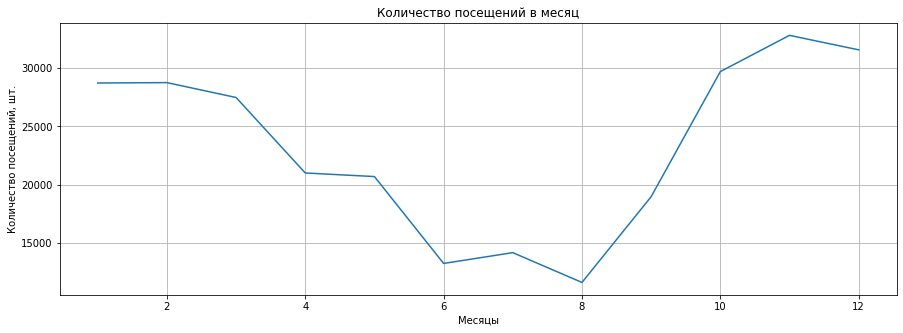

In [ ]:
mau_total.plot(grid=True, title='Количество посещений в месяц', figsize=(15, 5),legend=False)
plt.gca().set(xlabel='Месяцы', ylabel='Количество посещений, шт.')
plt.show()

Среднее MAU:

In [ ]:
mau_total.mean().astype('int')

uid    23228
dtype: int64

#### 2.1.2. Сколько сессий в день?

In [ ]:
sessions_per_user = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print(f'{int(sessions_per_user)} сессий в день')

987 сессий в день


#### 2.1.3. Сколько длится одна сессия?

In [ ]:
visits['session_duration_sec']=(visits['end_ts']-visits['start_ts']).dt.seconds
# print(round((visits['session_duration_sec'].mean()),1),'секунды')
#print(f'{round((visits['session_duration_sec'].mean()),1)} секунды')

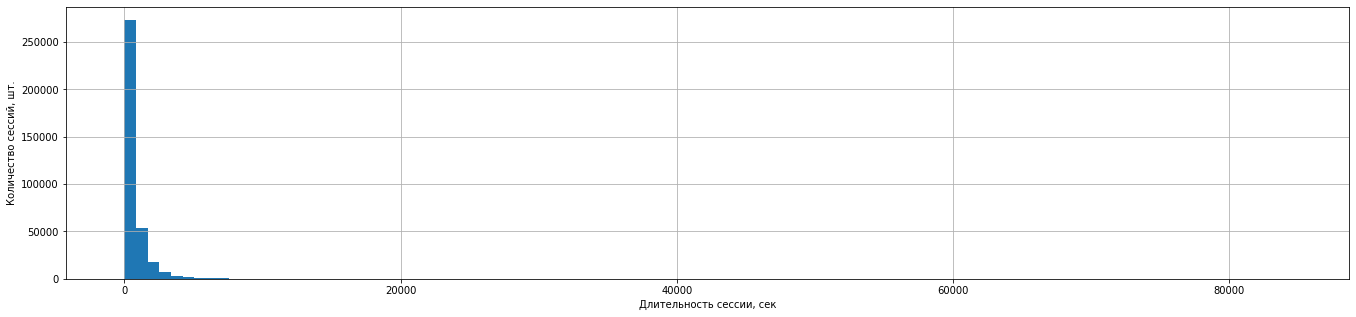

In [ ]:
ax=visits['session_duration_sec'].hist(bins=100, figsize=(23,5))
plt.xlabel('Длительность сессии, сек')
plt.ylabel('Количество сессий, шт.');

Отмечаем ненормальное распределение, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [ ]:
f"{round((visits['session_duration_sec'].mode()),1)} секунд"

'0    60\ndtype: int64 секунд'

#### 2.1.4. Как часто люди возвращаются?

Определим событие и период — на их основе сформируем когорту. Возьмём дату, когда пользователь впервые проявил активность.

Эти данные запишем в объект Series first_activity_date. Объединим его с исходным датафреймом visits:

In [ ]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')

Получим день начала месяца, за который произошло событие. Он станет идентификатором месяца. Параметр unit метода pd.to_timedelta задаёт единицу измерения — в нашем случае дня: unit='d'. Вычтем из даты порядковый номер дня:

In [ ]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты:

In [ ]:
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц жизни»:

In [ ]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю.
Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц:

In [ ]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]

Переименуем столбец uid в cohort_users - параметру columns передадим словарь, где ключ — старое название столбца, а значение — новое:

In [ ]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_activity_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Объединим данные по когортам с исходным количеством пользователей в когорте:

In [ ]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

In [ ]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


Построим сводную таблицу и создадим тепловую карту:

In [ ]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

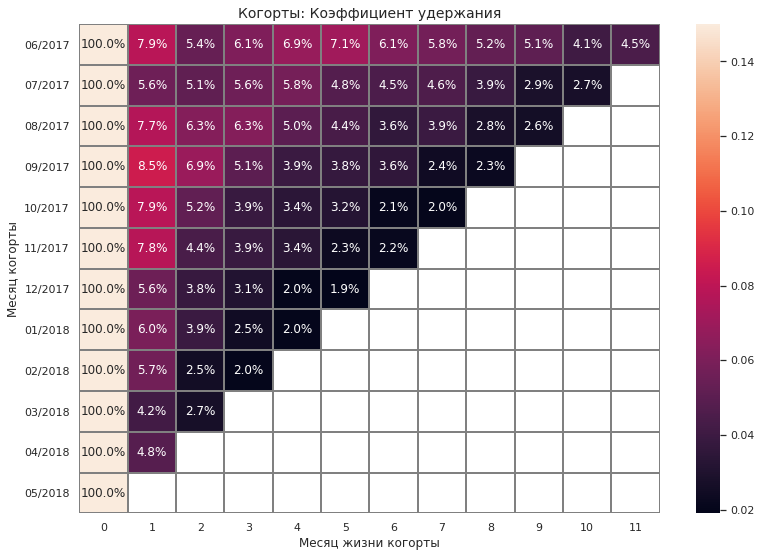

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Коэффициент удержания', size=14)
ax =sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.15)
ax.set_ylabel('Месяц когорты')
ax.set_xlabel('Месяц жизни когорты')
plt.show()

Низкий показатель Retention Rate (далее RR) вызван спецификой сервиса - люди эпизодически посещают какие-либо мероприятия мероприятия.
При этом самый высокий показатель RR у когорты 06/2017 - 4,5 % на 11 неделе.

###2.2. Продажи

#### 2.2.1. Когда люди начинают покупать?

Получим данные по количеству дней с момента от первого посещения пользователем сайта до совершения им первой покупки и построим распределение.

In [ ]:
first_order = orders.groupby(['uid'])['buy_ts'].min()
first_order.name = 'first_order'
visits = visits.join(first_order,on='uid')

In [ ]:
visits['first_order_day'] = visits['first_order'] - visits['first_activity_date']
visits['first_order_day'] = visits['first_order_day'] / np.timedelta64(1,'D')
visits['first_order_day']=visits['first_order_day'].apply(np.ceil)

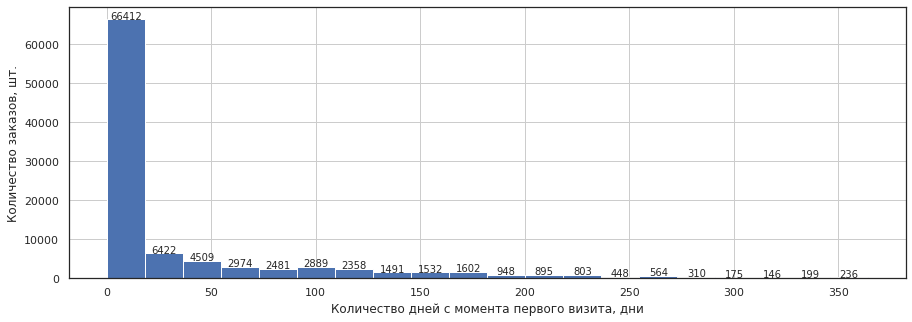

In [ ]:
ax=visits['first_order_day'].hist(bins=20, figsize=(15,5))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            fontsize=10,
            ha="center")
plt.xlabel('Количество дней с момента первого визита, дни')
plt.ylabel('Количество заказов, шт.')
plt.show()

Отмечаем ненормальное распределение, поэтому рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [ ]:
visits['first_order_day'].mode().astype('int')

0    1
dtype: int64

В большинстве случаев заказ делают в день первого визита на сайт.

#### 2.2.2. Сколько раз покупают за период?


Подсчитаем количество покупок за месячный интервал.

In [ ]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders_per_month = orders.groupby('order_month').agg({'revenue': 'count'}).rename(columns={'revenue':'n_purchases'})
orders_per_month

,n_purchases
order_month,
2017-06-01,2354
2017-07-01,2363
2017-08-01,1807
2017-09-01,3387
2017-10-01,5679
2017-11-01,5659
2017-12-01,6218
2018-01-01,4721
2018-02-01,5281


Удалим 1 покупку из июня 2018 года, т.к. она явно попала в выборку ошибочно и построим график.

In [ ]:
orders_per_month.drop(orders_per_month[orders_per_month['n_purchases']==1].index, inplace=True)
orders_per_month=orders_per_month.reset_index()

In [ ]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [ ]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Объединим количество покупок с количеством покупателей:

In [ ]:
orders_per_month

,order_month,n_purchases
0,2017-06-01,2354
1,2017-07-01,2363
2,2017-08-01,1807
3,2017-09-01,3387
4,2017-10-01,5679
5,2017-11-01,5659
6,2017-12-01,6218
7,2018-01-01,4721
8,2018-02-01,5281
9,2018-03-01,5326


In [ ]:
orders_per_month=pd.merge(orders_per_month, cohort_sizes, left_on='order_month', right_on='first_order_month')
orders_per_month['revenue_per_buyer']=orders_per_month['n_purchases']/orders_per_month['n_buyers']

In [ ]:
orders_per_month['revenue_per_buyer'].mean()
f"В среднем за 1 месяц покупают - {round(orders_per_month['revenue_per_buyer'].mean(),2)} раза"

'В среднем за 1 месяц покупают - 1.37 раза'

#### 2.2.3. Какой средний чек?

Средний чек посчитаем как среднюю выручку Яндекс.Афиши с заказов.

In [ ]:
print(orders['revenue'].mean())

4.999646930476993


#### 2.2.4. Сколько денег приносят? (LTV)

LTV удобно считать по когортам. Вспомним, что для этого нужно:
1.   найти дату первой покупки каждого покупателя;
2.   вычислить число новых покупателей за каждую дату;
3.   добавить дату первой покупки в таблицу с заказами;
4.   сгруппировать таблицу и посчитать выручку.

Получим месяц первой покупки каждого покупателя:

In [ ]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [ ]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [ ]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():

In [ ]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [ ]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


LTV считают из валовой прибыли, которая находится умножением выручки на маржинальность или разницей выручки и себестоимости. Из всех показателей нам доступны данные только по выручке, которую приравняем к значению валовой прибыли. Т.е. сделаем допущение, что 100 % выручки остаются в компании.

LTV — относительный показатель. Значит его удобнее смотреть по «возрастным» когортам, где в столбцах — не месяц заказа, а возраст (age) когорты.

In [ ]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц (в нашем случае выручку) на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [ ]:
report['ltv'] = report['revenue'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
output.index = output.index.strftime("%m/%Y")
output=output.cumsum(axis=1).round(2)

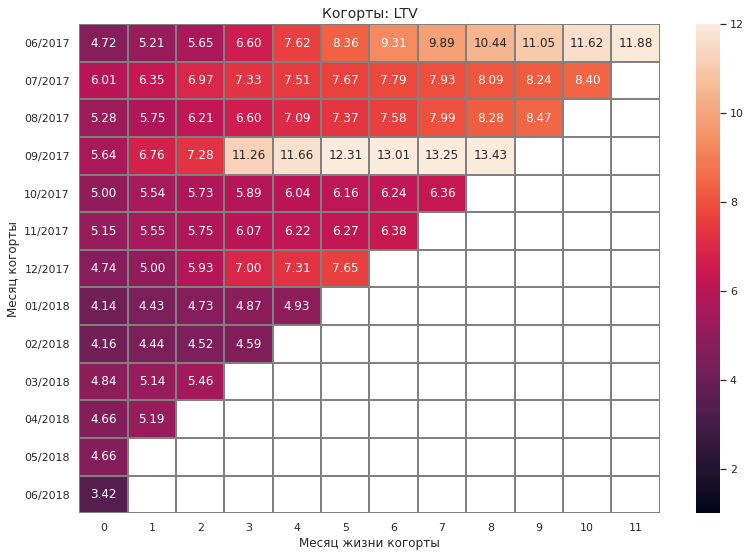

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: LTV', size=14)
ax=sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=1, vmax=12)
ax.set_ylabel('Месяц когорты')
ax.set_xlabel('Месяц жизни когорты')
plt.show()

###2.3. Маркетинг

#### 2.3.1.	Сколько денег потратили?

*   всего:





In [ ]:
print('Всего трат -', costs['costs'].sum())

Всего трат - 329131.62


*   на каждый источник:

In [ ]:
source_costs=costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
source_costs

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Максимально количество трат приходится на 3ий источник рекламы.

*   по времени - по месяцам:

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs=costs.groupby('month').agg({'costs':'sum'}).reset_index()
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Среднемесячные траты:

In [ ]:
monthly_costs.mean().round().astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


costs    27428
dtype: int64

#### 2.3.2. Сколько стоило привлечение одного покупателя из каждого источника?


CAC рассчитывается как отношение затрат на привлечение к количеству покупателей. Для начала посчитаем количество покупателей по каждому источнику рекламы:

In [ ]:
n_buyers_per_source=orders.merge(visits, on='uid')
n_buyers_per_source=n_buyers_per_source.groupby(['source_id']).agg({'uid':'nunique'}).reset_index()
n_buyers_per_source.columns=['source_id', 'n_buyers']
n_buyers_per_source

,source_id,n_buyers
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


Объединим поучившуюся таблицу с таблицей затрат:

In [ ]:
costs=pd.merge(costs, n_buyers_per_source, on='source_id')

Теперь рассчитаем CAC по идентификатору рекламного источника:

In [ ]:
source_cac = costs.groupby(['source_id', 'n_buyers']).agg({'costs':'sum'}).reset_index()
source_cac['cac'] = source_cac['costs'] / source_cac['n_buyers']
source_cac

,source_id,n_buyers,costs,cac
0,1,7138,20833.27,2.918642
1,2,7305,42806.04,5.859828
2,3,13846,141321.63,10.206676
3,4,14253,61073.60,4.284965
4,5,10156,51757.10,5.096209
5,9,2793,5517.49,1.975471
6,10,1773,5822.49,3.283976


Где траты больше всего, там и привлечение пользователя самое дорогое.

#### 2.3.3. На сколько окупились расходы? (ROI)

##### 2.3.3.1. Рассчитаем ROMI по когортам: поделим LTV на CAC.

Чтобы посчитать накопительный ROMI, вызовем метод cumsum() - он последовательно сложит ROMI по age:

In [ ]:
romi=pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
romi['cac'] = romi['costs'] / romi['n_buyers']
romi['romi'] = romi['ltv'] / romi['cac']
output = romi.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output=output.cumsum(axis=1).round(2)
output.index = output.index.strftime("%m/%Y")

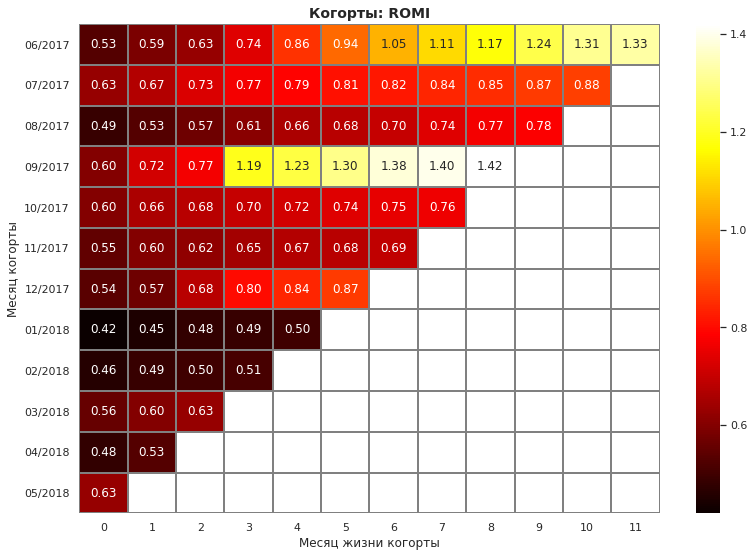

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: ROMI', size=14, weight = 'bold')
ax=sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap = 'hot')
ax.set_ylabel('Месяц когорты')
ax.set_xlabel('Месяц жизни когорты');

Из всех когорт окупились лишь июньская (на 6 месяце жизни) и сентябрьская (на 4 месяце).

##### 2.3.3.2. Рассчитаем ROMI по источникам рекламы

Будем рассчитывать ROMI как отношение выручки к затратам на рекламу в разрезе источников рекламы.

Для этого сначала узнаем рекламный источник первого визита для каждого пользователя и объединим получившиеся данные с таблицей orders:

In [ ]:
first_uid_source = visits.groupby(['uid'])['source_id'].min()
first_uid_source.name = 'first_uid_source'
first_uid_source = orders.join(first_uid_source,on='uid')
first_uid_source.head()

,buy_ts,revenue,uid,order_month,first_uid_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3


Теперь посмотрим на сумму выручки по каждому  рекламному источнику:

In [ ]:
revenue_by_source=first_uid_source.groupby(['first_uid_source'])['revenue'].sum().reset_index()
revenue_by_source

,first_uid_source,revenue
0,1,101631.38
1,2,43123.74
2,3,43354.82
3,4,36705.84
4,5,22919.80
5,7,1.22
6,9,1874.18
7,10,2446.22


Объединим эту таблицу с source_cac, в которой содержатся данные по затратам на рекламу и посчитаем ROMI по каждому источнику рекламы:

In [ ]:
romi_by_source = source_cac.merge(revenue_by_source, left_on='source_id', right_on='first_uid_source')
romi_by_source['romi']=romi_by_source['revenue']/romi_by_source['costs']
romi_by_source

,source_id,n_buyers,costs,cac,first_uid_source,revenue,romi
0,1,7138,20833.27,2.918642,1,101631.38,4.878321
1,2,7305,42806.04,5.859828,2,43123.74,1.007422
2,3,13846,141321.63,10.206676,3,43354.82,0.306781
3,4,14253,61073.60,4.284965,4,36705.84,0.601010
4,5,10156,51757.10,5.096209,5,22919.80,0.442834
5,9,2793,5517.49,1.975471,9,1874.18,0.339680
6,10,1773,5822.49,3.283976,10,2446.22,0.420133


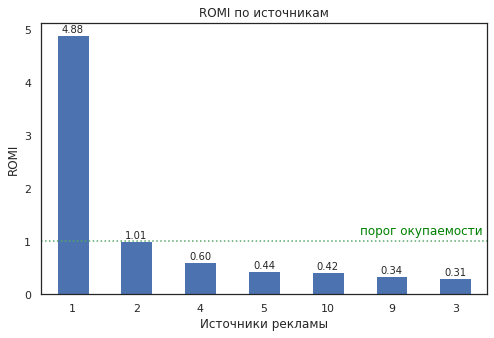

In [ ]:
output = romi_by_source.sort_values(by='romi', ascending=False).reset_index()

ax=output.plot(y='romi', x='source_id', kind='bar', figsize=(8, 5), title='ROMI по источникам', legend=False, rot=360)
plt.axhline(y=1, color='g', linestyle=':')
ax.text(.99, 0.21, 'порог окупаемости',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.05,
            '{:.2f}'.format(height),
            fontsize=10,
            ha="center")
plt.xlabel('Источники рекламы')
plt.ylabel('ROMI')
plt.show()

ROMI окупилось лишь по двум источникам рекламы - № 1 и 2, при этом по источнику № 1 - почти в 5 раз.

##Шаг 3. Общий вывод
---



При работе с проектом были выполнениы следующие шаги:
1. Загружены данные и подготовлены к анализу
2. Построены отчеты и посчитаны метрики
* Продукт

Сколько людей пользуются в день, неделю, месяц?

Сколько сессий в день?

Сколько длится одна сессия?

Как часто люди возвращаются?

* Продажи

Когда люди начинают покупать?

Сколько раз покупают за период?

Какой средний чек?

Сколько денег приносят?

* Маркетинг

Сколько денег потратили?
Всего / на каждый источник / по времени?

Сколько стоило привлечение одного покупателя из каждого источника?

На сколько окупились расходы?

####Резюме


---


Сервисом Яднекс.Афиша пользуются сайтом в месяц 23 228 человек.

Среднее количество сессий в день - 987 с средней длительностью около 11 минут.

Когорта 06/2017 имеет самый высокий коэффициент удержания (Retention Rate) на протяжении всего периода.

В большинстве случаев заказ делают в день первого визита на сайт и за 1 минуту - это говорит о том, что чаще всего люди заходят с конкретной целью - купить.

В среднем за 1 месяц каждый пользователь покупает - 1,37 раз.

Средний чек составляет - 5 у.е.

Самая дорогая стоимость привлечения отмечена по источникам № 3, 2 и 5.

Из всех когорт окупились лишь июньская (на 6 месяце жизни) и сентябрьская (на 4 месяце).

ROMI окупилось лишь по двум источникам рекламы - № 1 и 2, при этом по источнику № 1 - почти в 5 раз.

Общий вывод:

Самая удачная стратегия проявила себя в сентябре 2017 г., на нее и стоит ориентироваться в дальнейшем.

ROMI окупилось лишь по двум источникам рекламы - № 1 и 2, поэтому имеет ссмысл отказаться от иных источников.